# More Stock Manipulations

In [19]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates =True, index_col=0) 

#df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [24]:
df_ohlc = df['Adj Close'].resample('10D').ohlc() #ohlc : open high low close
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


Resampling data allows you to shrink down the amount of data you have into even intervals (ex. every 10 days, 10 hours, etc)
- .ohlc() method: gathers the sums of the open high low and close values

In [21]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [22]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [26]:
df_ohlc.values

array([[ 23.88999939,  23.88999939,  15.80000019,  17.45999908],
       [ 17.39999962,  20.63999939,  17.04999924,  20.63999939],
       [ 21.90999985,  21.90999985,  20.21999931,  20.71999931],
       ...,
       [339.52999878, 393.1499939 , 339.52999878, 393.1499939 ],
       [404.04000854, 430.94000244, 404.04000854, 430.38000488],
       [414.70001221, 418.32998657, 414.70001221, 418.32998657]])

Mapping: allows you to map new values into a series (column) of data depending on the input/argument

mdates.date2num: converts the date into a raw number that can be plotted chronologically with matplotlib

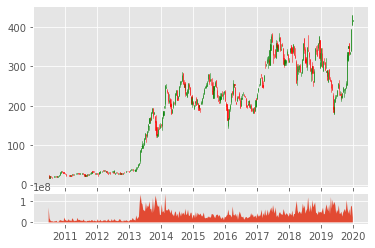

In [23]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)